# BUAN 6341 – Applied Machine Learning

                                                               Project work submitted by:
                                                                               - Aniparna Sengupta, axs169330
                                                                              


## [TABLE OF CONTENTS](#Table-of-contents)

1. [INTRODUCTION](#INTRODUCTION)

2. [THE PROBLEM DOMAIN](#THE-PROBLEM-DOMAIN)

3. [DATA DICTIONARY](#DATA-DICTIONARY)

4. [METRIC FOR SUCESS](#METRIC-FOR-SUCESS)

5. [USED LIBRARIES](#USED-LIBRARIES)

6. [EXPLORATION DATA ANALYSIS](#EXPLORATION-DATA-ANALYSIS)

7. [DATA CLEANING](#DATA-CLEANING)

9. [FINE TUNING AND RUNNING VARIOUS MODELS](#FINE-TUNING-ALGORITHM)

11. [CONCLUSION](#CONCLUSION)

12. [EFFORT OF EACH TEAM MEMBER](#EFFORT-OF-EACH-TEAM-MEMBER)

## INTRODUCTION

[[ go back to the top ]](#Table-of-contents)

**Housing Dataset Overview: **

The data given to us:

        House Prices (home_price.csv)

We used the dataset to build your machine learning models. We predicted the prices for each houses. Our model was based on “features” like number of bedrooms & bathrooms, square footage of the lot & living room, total floors in house, etc.

We divided the data into train and test set and afterwards we used the test set to see how well your model performs on unseen data. For each houses in the test set, we used our model to predict its market price.


## THE PROBLEM DOMAIN

[[ go back to the top ]](#Table-of-contents)
 
The main objective of this project is to identify the house prices using key parameters and ignoring the uncessary or correlated variables present.


### *House Prices*
<img src="https://www.networkauctions.co.uk/images/house%20prices%20up.jpg" />


## DATA DICTIONARY

[[ go back to the top ]](#Table-of-contents)

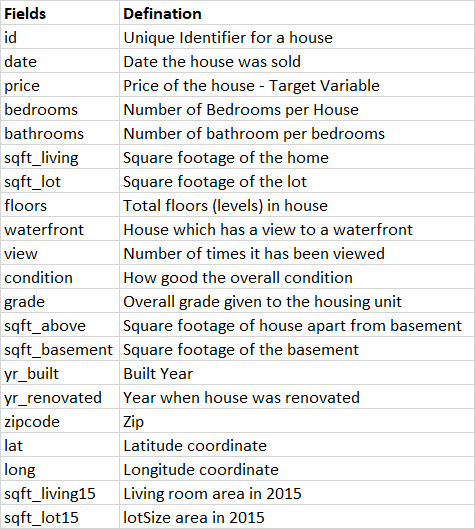

## METRIC FOR SUCESS 

[[ go back to the top ]](#Table-of-contents)

we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of closely predicted prices — to quantify how well our model is performing. Based on the quality of data and preliminary baseline models we should try to achieve at least 80% accuracy.

## USED LIBRARIES

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

**Importing the libraries**

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score

C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EXPLORATION DATA ANALYSIS

[[ go back to the top ]](#Table-of-contents)

Let's look at the data we're working with. It's vital that we spot any data errors before investing too much time in our analysis.

We are looking to answer the following questions:

* Is there anything wrong with the data?
* Are there any quirks with the data?
* Do I need to fix or remove any of the data?

Let's start by reading the data into a pandas DataFrame.

In [2]:
# Reading our dataset
dataset = pd.read_csv('D:/Personal/python/Assgnment2/home_price.csv',index_col = 0)

**One of the first things we should look for is missing data.**

In [3]:
dataset = pd.read_csv('D:/Personal/python/Assgnment2/home_price.csv',index_col = 0, na_values=['NA',''])

Now pandas knows to treat rows with 'NA' as missing values.

Next, we will look at the distribution of our data — especially the outliers.
We will start by printing out some summary statistics about the data set.

In [4]:
dataset.shape

(21613, 20)

**we have approximately 22000 records with 20 different columns!**

Now let's look at the data structure

In [5]:
dataset.head(1).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 7129300520 to 7129300520
Data columns (total 20 columns):
date             1 non-null object
price            1 non-null int64
bedrooms         1 non-null int64
bathrooms        1 non-null float64
sqft_living      1 non-null int64
sqft_lot         1 non-null int64
floors           1 non-null float64
waterfront       1 non-null int64
view             1 non-null int64
condition        1 non-null int64
grade            1 non-null int64
sqft_above       1 non-null int64
sqft_basement    1 non-null int64
yr_built         1 non-null int64
yr_renovated     1 non-null int64
zipcode          1 non-null int64
lat              1 non-null float64
long             1 non-null float64
sqft_living15    1 non-null int64
sqft_lot15       1 non-null int64
dtypes: float64(4), int64(15), object(1)
memory usage: 168.0+ bytes


In [6]:
dataset.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

## DATA CLEANING

[[ go back to the top ]](#Table-of-contents)

Based on this we can see that most of the columns looks higly related and for other we may need to create dummy variables.

**Let us test and fix these.**

**Dummy variable treatment:**

**Now let's convert condition column into a dummy variable.**

In [8]:
mapping_condition = {1:'con_1',2:'con_2',3:'con_3',4:'con_4',5:'con_5'}
for elem in dataset['condition'].unique():
    dataset[mapping_condition[elem]] = dataset['condition'] == elem
    dataset

In [9]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,con_3,con_5,con_4,con_1,con_2
id,,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,True,False,False,False,False
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,True,False,False,False,False
5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,True,False,False,False,False
2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,False,True,False,False,False
1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,True,False,False,False,False


In [10]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'con_3', 'con_5', 'con_4', 'con_1',
       'con_2'],
      dtype='object')

**Similarly, let's convert few other columns into a dummy variable: zipcode, renovated or not.**

In [11]:
dataset_zipcode_preprocessed = pd.concat([dataset.drop('zipcode', axis=1), pd.get_dummies(dataset['zipcode'])], axis=1)
dataset_zipcode_preprocessed['YNrenovated']= 0
dataset_zipcode_preprocessed.loc[ dataset_zipcode_preprocessed['yr_renovated'] >= 1, 'YNrenovated'] = 1
dataset_zipcode_preprocessed = dataset_zipcode_preprocessed.drop(98148,axis = 1)

**Now let's look into the correlation to remove few of the highly correlated variables.**

Since we have so many columns we exported the data into an excel to verufy the data once.

In [12]:
a=dataset_zipcode_preprocessed.corr()
#a.to_csv("corrHouse.csv",index=False)

**Based on the correlation plot we are removing:**

**sqft_above, yr_renovated and sqft_living15**

Based on the correlation plot we are removing:
sqft_above, yr_renovated and sqft_living15

In [13]:
df=dataset_zipcode_preprocessed.drop(['yr_renovated','sqft_living15','sqft_above',"date",'lat','long','condition','con_1'], axis = 1)
df.columns

Index([        'price',      'bedrooms',     'bathrooms',   'sqft_living',
            'sqft_lot',        'floors',    'waterfront',          'view',
               'grade', 'sqft_basement',      'yr_built',    'sqft_lot15',
               'con_3',         'con_5',         'con_4',         'con_2',
                 98001,           98002,           98003,           98004,
                 98005,           98006,           98007,           98008,
                 98010,           98011,           98014,           98019,
                 98022,           98023,           98024,           98027,
                 98028,           98029,           98030,           98031,
                 98032,           98033,           98034,           98038,
                 98039,           98040,           98042,           98045,
                 98052,           98053,           98055,           98056,
                 98058,           98059,           98065,           98070,
                 98072,  

**Finally! Let's now create the X and Y dataset.**

In [14]:
X_dataset = df.iloc[:,1:]
y_dataset = df['price']

**Now we will do min-max scaling before running our regression model.**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, random_state=0)

**Okay! Now our data is ready for the next Linear regression model.**
We will be calculating the Residual sum of square using formula afterwards.

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# we must apply the scaling to the test set that we computed for the training set
#transformation keeps the min max value from fit_transform fn used for training

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(X_train_scaled, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test_scaled, y_test)))

# The Residual sum of square
print("Residual sum of squares: %.2f"
% ((linreg.predict(X_test_scaled) - y_test) ** 2).sum())

linear model coeff (w): [ -850984.85423529   137108.84564992  2857525.31882987   416903.66216744
  -108025.03474649   683178.7247397    218967.02919182   707361.9061807
  -365895.66060427   -78852.93004476  -124470.3951393     19772.18900085
    82781.34673173    40911.85688469    41290.29241605   -62271.56587147
   -41320.03287318   -74961.87683077   717040.98911422   239204.41124643
   196602.19183263   181871.5146047    193894.98352505     7945.63187104
    53112.14154054    50959.20023669    22694.0676868    -75814.62681176
  -100564.78535321    93554.8786998    102744.25051994    54478.13969728
   152165.96344525   -52314.40466521   -50454.10228539   -50269.41501161
   301732.70543405   141757.06253787   -30373.28072004  1085976.21033781
   445675.86756301   -56002.82913324    24905.08930499   171039.72023583
   136228.64086263   -11259.47483329    35442.023497     -32297.999254
    21027.36878445    22889.64724313   -90265.79408936    87730.93825064
   110756.24757373   107238.24

# Woo-hoo! we have achieved an accuracy of around **80%** by just using Linear Regression on our scaled data set.

**Now Let's get the model in a matrix format with it many coefficient:**

In [18]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from scipy import stats

lm = LinearRegression()
X = X_train_scaled
y = y_train
lm.fit(X,y)
params = np.append(lm.intercept_,lm.coef_)
predictions = lm.predict(X)

newX = pd.DataFrame({"Constant":np.ones(len(X))}).join(pd.DataFrame(X))
MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

# Note if you don't want to use a DataFrame replace the two lines above with
# newX = np.append(np.ones((len(X),1)), X, axis=1)
# MSE = (sum((y-predictions)**2))/(len(newX)-len(newX[0]))

var_b = MSE*(np.linalg.inv(np.dot(newX.T,newX)).diagonal())
sd_b = np.sqrt(var_b)
ts_b = params/ sd_b

p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

sd_b = np.round(sd_b,3)
ts_b = np.round(ts_b,3)
p_values = np.round(p_values,3)
params = np.round(params,4)

myDF3 = pd.DataFrame()
myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t values"],myDF3["Probabilites"] = [params,sd_b,ts_b,p_values]
print(myDF3)

    Coefficients  Standard Errors  t values  Probabilites
0  -2.721558e+05        40213.432    -6.768         0.000
1  -8.509849e+05        57940.991   -14.687         0.000
2   1.371088e+05        24404.458     5.618         0.000
3   2.857525e+06        43229.560    66.101         0.000
4   4.169037e+05        73310.722     5.687         0.000
5  -1.080250e+05         9171.789   -11.778         0.000
6   6.831787e+05        16112.816    42.400         0.000
7   2.189670e+05         8123.917    26.953         0.000
8   7.073619e+05        24651.983    28.694         0.000
9  -3.658957e+05        20285.843   -18.037         0.000
10 -7.885293e+04         8735.178    -9.027         0.000
11 -1.244704e+05        61087.497    -2.038         0.042
12  1.977219e+04        32760.365     0.604         0.546
13  8.278135e+04        32992.507     2.509         0.012
14  4.091186e+04        32765.177     1.249         0.212
15  4.129029e+04        35509.453     1.163         0.245
16 -6.227157e+

**Let's call this Table as "LR Coefficients"**

# Interpretation of coefficient shown above.

In [19]:
X_train.columns

Index([     'bedrooms',     'bathrooms',   'sqft_living',      'sqft_lot',
              'floors',    'waterfront',          'view',         'grade',
       'sqft_basement',      'yr_built',    'sqft_lot15',         'con_3',
               'con_5',         'con_4',         'con_2',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,  

All **Dummy variables** Like all the zipcodes, YNrenovated, and condition were studied properly and we can see that the condition of 3 rating has very high coefficient compared to other dummy variables since they are having very less coefficient dependency with our Y output variable.

In the table "LR Coefficients" we have put the summary detail of all the variables into this table:

**Coefficients**:: It is the linear dependency of the variable X to the price Y. 
Example: "grade" is having a coef. of 7.073619e+05 which means our y is proportional to 7.073619e+05 times grade value. 

**Standard Errors**:: It is the standard deviation of the sampling distribution of the estimate of the coefficient under the standard regression assumptions. Such standard deviations are called standard errors of the corresponding quantity (the coefficient estimate in this case)
Example: "grade" has a standard error of 24651.983

**t values**:: It is the value of the t-statistic for testing whether the corresponding regression coefficient is different from 0.
Example: "grade" has a t value of 28.694

**Probabilites**:: It is the p-value for the hypothesis test for which the t value is the test statistic. It tells you the probability of a test statistic at least as unusual as the one you obtained, if the null hypothesis were true. In this case, the null hypothesis is that the true coefficient is zero; if that probability is low, it's suggesting that it would be rare to get a result as unusual as this if the coefficient were really zero.
Example: "grade" has a p value of 0.000 which means this variable is not significant is determining the price variable.


# Let's jump to polynomial regression now!

**In this we have taken a sample of data to identify the most suitable degree for the polynomial regression.**

In [20]:
X_dataset_sub = X_dataset[:5000]
y_dataset_sub = y_dataset[:5000]
temp=[]
poly_values = []
for i in range(1,3):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_dataset)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset, random_state = 0)

    linreg = LinearRegression().fit(X_train, y_train)
    predict_y = linreg.predict(X_test)

    coeff = linreg.coef_
    inter = linreg.intercept_
    train_score = linreg.score(X_train, y_train)
    test_score = linreg.score(X_test, y_test)
    
    temp=[]
    temp.append(i)
    temp.append(train_score)
    temp.append(test_score)
    temp
    poly_values.append(temp)
    
    
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_dataset_sub)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset_sub, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)

coeff = linreg.coef_
inter = linreg.intercept_
train_score = linreg.score(X_train, y_train)
test_score = linreg.score(X_test, y_test)

i = 3
temp=[]
temp.append(i)
temp.append(train_score)
temp.append(test_score)
temp
poly_values.append(temp) 

**From the below output we can see that the degree 2 is the best model as the training score is 91.93% and test score is 88.40%**

In [21]:
poly_value1=pd.DataFrame(poly_values,columns= ['degree',"train","test"])
poly_value1.set_index('degree')

,train,test
degree,,
1,0.806738,0.809686
2,0.919363,0.884010
3,0.982775,-45235.737858


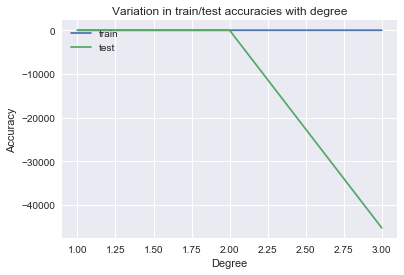

In [22]:
plt.close()
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.title('Variation in train/test accuracies with degree')
plt.grid(True)
plt.plot(poly_value1['degree'],poly_value1['train'])
plt.plot(poly_value1['degree'],poly_value1['test'])
plt.legend(['train','test'], loc='upper left')
plt.show()

**The above graph shows that after the degree of 2 the test curve had the negative slope. Thus degree 2 is the most suitable one.**

In [23]:
X_dataset.columns

Index([     'bedrooms',     'bathrooms',   'sqft_living',      'sqft_lot',
              'floors',    'waterfront',          'view',         'grade',
       'sqft_basement',      'yr_built',    'sqft_lot15',         'con_3',
               'con_5',         'con_4',         'con_2',           98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,  

**Here we are selecting different subset of data to identify the best dataset for the polynomial regression by calculating the R2 score of both train and test as well as plotting the scatter plot**

In [24]:
X1_list =["bedrooms","bathrooms","sqft_living","sqft_lot","floors",
          "waterfront","view","grade","sqft_basement","yr_built","sqft_lot15"]

In [25]:
X2_list =["bedrooms","bathrooms","sqft_living","sqft_lot","floors",
          "waterfront","view","grade","sqft_basement","yr_built","sqft_lot15","YNrenovated"]

In [26]:
X3_list =["bedrooms","bathrooms","sqft_living","sqft_lot","floors",
          "waterfront","view","grade","sqft_basement","yr_built","sqft_lot15","YNrenovated",'con_3','con_5','con_4','con_2']

In [27]:
X4_list = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors",98001,
                 98002,           98003,           98004,           98005,
                 98006,           98007,           98008,           98010,
                 98011,           98014,           98019,           98022,
                 98023,           98024,           98027,           98028,
                 98029,           98030,           98031,           98032,
                 98033,           98034,           98038,           98039,
                 98040,           98042,           98045,           98052,
                 98053,           98055,           98056,           98058,
                 98059,           98065,           98070,           98072,
                 98074,           98075,           98077,           98092,
                 98102,           98103,           98105,           98106,
                 98107,           98108,           98109,           98112,
                 98115,           98116,           98117,           98118,
                 98119,           98122,           98125,           98126,
                 98133,           98136,           98144,           98146,
                 98155,           98166,           98168,           98177,
                 98178,           98188,           98198,           98199]


In [28]:
X1_dataset = X_dataset[X1_list]
X2_dataset = X_dataset[X2_list]
X3_dataset = X_dataset[X3_list]
X4_dataset = X_dataset[X4_list]

(21613, 11)
(poly deg 2) linear model coeff (w):
[  6.74997934e+00   2.10089620e+05  -1.32790772e+06   2.30634619e+03
  -1.78081687e+01  -2.32432186e+06  -3.87694713e+06   2.74298170e+05
   1.73455063e+06  -2.20444816e+02  -6.47186223e+04  -3.30565547e+01
   7.59416470e+02   1.97337116e+02   1.08605095e+00  -1.11657805e-01
   7.52437079e+03   4.57822624e+04  -3.68523831e+03   9.90125138e+01
  -5.94124086e+00  -1.23178858e+02   3.68708457e-01  -1.26859002e+04
   1.97043105e+01  -1.09037473e-01  -2.96442621e+04  -2.34881198e+03
   2.30487992e+03   2.08286285e+04  -5.03711400e+00   6.42295397e+02
  -1.99261272e-01   7.79307209e-03  -5.27679455e-04  -3.51185310e+01
   3.40004414e+02  -9.78161899e+00   2.84011204e+01   8.47187405e-03
  -1.22166084e+00   1.65190548e-04   2.04890966e-07   4.29568104e-01
  -7.17328363e-01  -6.64792280e-02   1.91995669e-01   4.18790616e-04
   8.79127090e-03   1.71712600e-06   3.53543289e+04  -1.11805517e+05
   3.12468209e+03  -4.42628913e+03   3.24886369e+01   

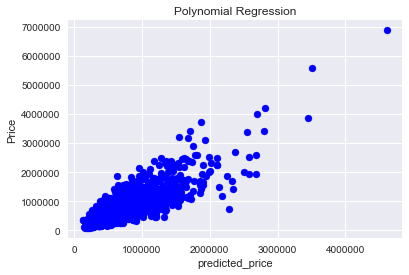

(21613, 12)
(poly deg 2) linear model coeff (w):
[  9.90432023e+00   3.01067606e+05  -9.15283701e+05   1.73147141e+03
  -1.47685267e+01  -1.83737655e+06  -3.81685217e+06   2.72422690e+05
   1.68514462e+06  -4.17224718e+02  -8.05272049e+04  -3.92804932e+01
  -2.34643558e+06   6.82263989e+02   5.47608131e+02   3.39440923e+00
  -1.33678426e-01   5.26883545e+03   6.24465523e+04  -4.09478754e+03
  -5.46264711e+02  -6.46861218e+00  -1.67168074e+02   4.09168646e-01
  -1.70912242e+04  -1.12591215e+04   1.85969099e+01  -1.08188317e-01
  -2.34055481e+04  -7.98447496e+03   3.95807838e+03   1.94899853e+04
  -1.18558659e+01   4.32415934e+02  -2.49861465e-01  -4.12532402e+04
   4.91116359e-03  -4.56063775e-04  -3.48216881e+01   3.27303981e+02
  -9.22889306e+00   3.03131610e+01   1.13530216e-02  -9.37571093e-01
   1.17272255e-04   6.03603890e+01   1.64727680e-07   4.25535225e-01
  -7.36638700e-01  -5.94911351e-02   1.72021893e-01   4.08596825e-04
   7.30171497e-03   1.70117710e-06  -3.33185913e-01   

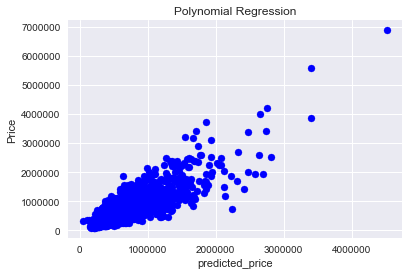

(21613, 16)
(poly deg 2) linear model coeff (w):
[ -8.92900297e+00   6.67250826e+05  -1.69937126e+06   1.23368700e+03
  -1.98147904e+00  -2.81946388e+06  -4.65679872e+06   6.39765840e+05
   1.59568024e+06  -1.12527492e+03  -6.95461413e+04  -6.71512117e+01
  -2.65923649e+06   1.15525198e+07   1.10833188e+07   1.22987983e+07
   1.28854978e+07   1.02578490e+03   1.77784012e+03   2.29199045e+00
  -1.51531570e-01   6.22603335e+03   8.09541587e+04  -3.02234647e+03
  -1.20558131e+03  -7.03638849e+00  -3.36751056e+02   4.34377383e-01
  -2.61176327e+04  -2.59591464e+04  -4.57609223e+04  -3.48284911e+04
  -3.53053503e+04  -1.05725100e+04   1.85808375e+01  -9.70765231e-02
  -2.16235443e+04  -3.63912880e+04   4.94425352e+03   1.84286010e+04
  -1.33082918e+01   5.20682985e+02  -2.50565095e-01  -3.48728357e+04
   6.03464692e+05   6.05083337e+05   6.06179044e+05   6.70102083e+05
   5.28256781e-03  -3.97955533e-04  -3.26395382e+01   3.45965184e+02
  -1.28510261e+01   3.03828090e+01   2.06612406e-02  -

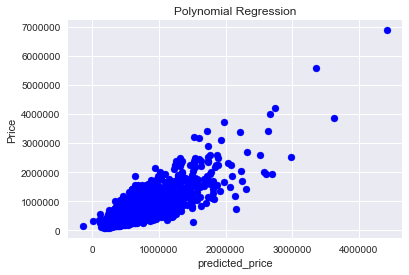

(21613, 74)
(poly deg 2) linear model coeff (w):
[  2.29165419e+07   1.37542172e+04   7.27630963e+04 ...,  -2.90874383e+04
   0.00000000e+00  -6.81190427e+04]
(poly deg 2) linear model intercept (b): -22796222.309
(poly deg 2) R-squared score (training): 0.829
(poly deg 2) R-squared score (test): 0.824



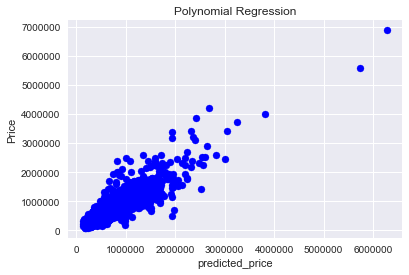

(21613, 85)
(poly deg 2) linear model coeff (w):
[  1.62200850e+07   5.43225833e+05  -4.62503375e+05 ...,   1.32730448e+06
   3.19034352e+03   5.08141678e+03]
(poly deg 2) linear model intercept (b): 29336809.367
(poly deg 2) R-squared score (training): 0.919
(poly deg 2) R-squared score (test): 0.884



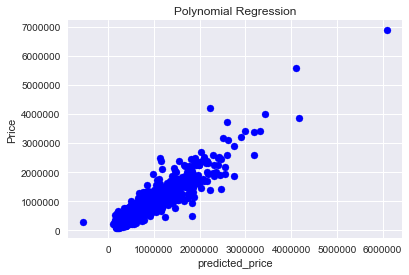

In [29]:
poly = PolynomialFeatures(degree=2)
x_datasets = [X1_dataset, X2_dataset, X3_dataset, X4_dataset,X_dataset]
for i in x_datasets:
    X_poly = poly.fit_transform(i)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset, random_state = 0)
    print(i.shape)
    linreg = LinearRegression().fit(X_train, y_train)
    predict_y = linreg.predict(X_test)

    print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
    print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
    print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
    print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))
    plt.scatter(predict_y, y_test, color = 'blue')
    plt.title('Polynomial Regression')
    plt.xlabel('predicted_price')
    plt.ylabel('Price')
    plt.show()

**The above output is big: Please scroll down to get the overall output.**

**Thus we select the degree of 2 and dataset of x_dataset whose R2(Training) is 91.9% and R2(Test) is 88.4%**

In [30]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X_dataset)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset, random_state = 0)

linreg = LinearRegression().fit(X_train, y_train)
predict_y = linreg.predict(X_test)

print('(poly deg 2) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2) R-squared score (test): {:.3f}\n'
     .format(linreg.score(X_test, y_test)))

(poly deg 2) linear model coeff (w):
[  1.62200850e+07   5.43225833e+05  -4.62503375e+05 ...,   1.32730448e+06
   3.19034352e+03   5.08141678e+03]
(poly deg 2) linear model intercept (b): 29336809.367
(poly deg 2) R-squared score (training): 0.919
(poly deg 2) R-squared score (test): 0.884



Let's plot the scatter plot to show the accuracy of the predicted value compared to actual. 

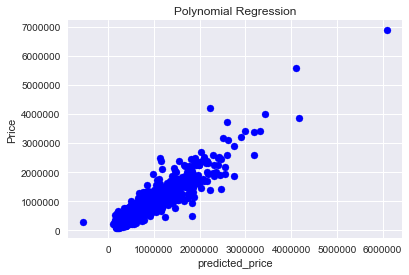

In [31]:
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()

**Then we are defining the best alpha value for Ridge regression.**

In [32]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_dataset)

In [33]:
temp = []
ridge_values2 = []
#X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset)
for this_alpha in [0.0001,0.001,0.01,0.1,1,10,20]:
    linridge = Ridge(alpha = this_alpha, normalize = True)
    cv_scores = cross_val_score(linridge, X_poly, y_dataset)
    mean_cv = np.mean(cv_scores)
    temp=[]
    temp.append(this_alpha)
    temp.append(mean_cv)
    temp
    ridge_values2.append(temp)
ridge_values2

[[0.0001, 0.87581594382554073],
 [0.001, 0.87805915000366141],
 [0.01, 0.88028597250672114],
 [0.1, 0.87673145962240417],
 [1, 0.85621501787252574],
 [10, 0.7236803369560203],
 [20, 0.61219464770606591]]

**The above value states that alpha = 0.01 is the most suitable one. Thus we will execute the ridge regression on this alpha value going forward.**

In [34]:
ridge_value=pd.DataFrame(ridge_values2,columns= ['alpha',"train"])
ridge_value.set_index('alpha')

,train
alpha,
0.0001,0.875816
0.0010,0.878059
0.0100,0.880286
0.1000,0.876731
1.0000,0.856215
10.0000,0.723680
20.0000,0.612195


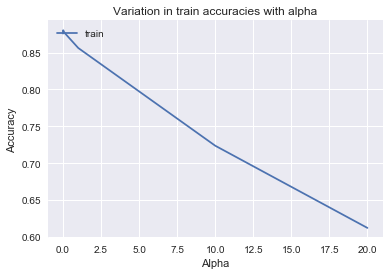

In [35]:
plt.close()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Variation in train accuracies with alpha')
plt.grid(True)
plt.plot(ridge_value['alpha'],ridge_value['train'])
plt.legend(['train'], loc='upper left')
plt.show()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset, random_state = 0)
linreg = Ridge(alpha = 0.01, normalize = True).fit(X_train, y_train)

print('(poly deg 2 + ridge) linear model coeff (w):\n{}'
     .format(linreg.coef_))
print('(poly deg 2 + ridge) linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('(poly deg 2 + ridge) R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('(poly deg 2 + ridge) R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

(poly deg 2 + ridge) linear model coeff (w):
[     0.          -3688.60201873 -12990.30352318 ..., -23914.41479581
 -18017.32593533 -20857.66181944]
(poly deg 2 + ridge) linear model intercept (b): 29140.690
(poly deg 2 + ridge) R-squared score (training): 0.914
(poly deg 2 + ridge) R-squared score (test): 0.889


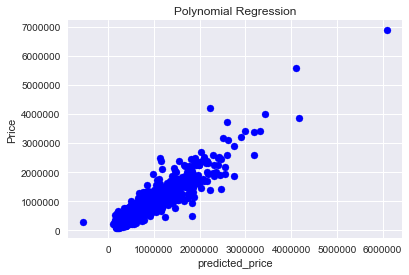

In [37]:
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()

Lasso

In [75]:
temp = []
lasso_values = []
#X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset)
for this_alpha in [0.01,0.1,1,10,20]:
    linlasso = Lasso(alpha=this_alpha, normalize = True)
    cv_scores = cross_val_score(linlasso, X_poly, y_dataset)
    mean_cv = np.mean(cv_scores)
    temp=[]
    temp.append(this_alpha)
    temp.append(mean_cv)
    temp
    lasso_values.append(temp)
lasso_values

C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

[[0.01, 0.87439815169477153],
 [0.1, 0.87626709380449219],
 [1, 0.88137018187962501],
 [10, 0.8806885519496731],
 [20, 0.87742201004451859]]

Seeing the output above we see that the train score of 88% is achieved for Alpha value of 1.00. So we are choosing alpha of 1.00

In [39]:
#lasso_value=pd.DataFrame(lasso_values,columns= ['alpha',"train"])
#lasso_value.set_index('alpha')

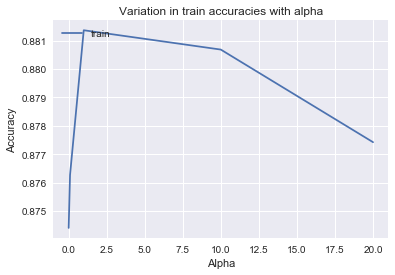

In [76]:
plt.close()
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Variation in train accuracies with alpha')
plt.grid(True)
plt.plot([values[0] for values in lasso_values ], [ values[1] for values in lasso_values ])
plt.legend(['train'], loc='upper left')
plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y_dataset, random_state = 0)

linlasso = Lasso(alpha=1.0, max_iter = 1000).fit(X_train, y_train)
predict_y = linreg.predict(X_test)

print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')
for e in sorted (list(zip(list(X_train), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

C:\Users\sopas\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


lasso regression linear model intercept: 3556474.3607232682
lasso regression linear model coeff:
[     0.          27034.09313231  56386.85651138 ...,  27735.98900028
 -25752.2223128  -36276.57509895]
Non-zero features: 1204
R-squared score (training): 0.917
R-squared score (test): 0.886

Features with non-zero weight (sorted by absolute magnitude):
	[ 1.  3.  1. ...,  0.  0.  0.], -769769.847
	[ 1.   2.   1.5 ...,  0.   0.   1. ], 736111.572
	[ 1.  4.  2. ...,  0.  0.  0.], 724117.809
	[ 1.   4.   2.5 ...,  0.   0.   0. ], -650500.100
	[ 1.   3.   2.5 ...,  0.   0.   0. ], 626218.940
	[ 1.    3.    2.25 ...,  0.    0.    0.  ], 624669.229
	[ 1.   3.   2.5 ...,  0.   0.   0. ], -615379.632
	[ 1.   4.   2.5 ...,  0.   0.   0. ], -605807.392
	[ 1.  3.  1. ...,  0.  0.  0.], -597693.225
	[ 1.  2.  1. ...,  0.  0.  0.], -555818.192
	[ 1.  4.  1. ...,  0.  0.  0.], 553213.458
	[ 1.  3.  3. ...,  0.  0.  0.], -530004.315
	[ 1.    3.    2.25 ...,  0.    0.    0.  ], 527894.192
	[ 1.   3.   2.

	[ 1.   5.   2.5 ...,  0.   0.   0. ], 63767.128
	[ 1.   4.   2.5 ...,  0.   0.   0. ], 63464.520
	[ 1.   5.   2.5 ...,  0.   0.   0. ], -62791.701
	[ 1.   4.   2.5 ...,  0.   0.   0. ], 62537.559
	[ 1.   4.   2.5 ...,  0.   0.   0. ], 62437.962
	[ 1.  4.  1. ...,  0.  0.  0.], -61488.557
	[ 1.    4.    1.75 ...,  0.    0.    0.  ], 61250.338
	[ 1.   4.   2.5 ...,  0.   0.   0. ], 60899.360
	[ 1.    3.    2.25 ...,  0.    0.    0.  ], 60696.388
	[ 1.  4.  2. ...,  0.  0.  0.], 60124.264
	[ 1.   4.   3.5 ...,  0.   0.   0. ], 60113.249
	[ 1.  2.  1. ...,  0.  0.  0.], -60054.160
	[ 1.   3.   2.5 ...,  0.   0.   0. ], -58695.001
	[ 1.   5.   2.5 ...,  0.   0.   0. ], -58562.240
	[ 1.   3.   2.5 ...,  0.   0.   0. ], 57988.843
	[ 1.  4.  1. ...,  0.  0.  0.], -57887.451
	[ 1.  6.  2. ...,  0.  0.  0.], 57230.274
	[ 1.    4.    2.25 ...,  0.    0.    0.  ], 56995.710
	[ 1.   3.   2.5 ...,  1.   0.   0. ], 56984.528
	[ 1.    6.    2.25 ...,  0.    0.    0.  ], 56947.601
	[ 1.   3.   2.5 ...

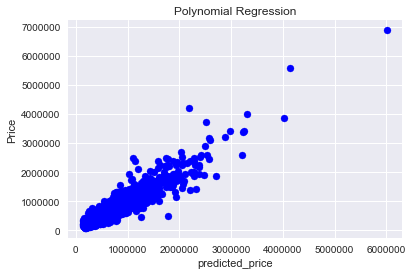

In [78]:
plt.scatter(predict_y, y_test, color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('predicted_price')
plt.ylabel('Price')
plt.show()

# Next we have K-NN regressor:

In [79]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

temp=[]
knn_values = []
K_values = [1,2,3,4,5,6,7,8,9,10]
for i in K_values:
    knn = KNeighborsRegressor(n_neighbors = i )
    knnreg = knn.fit(X_train_scaled, y_train)
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(X_train_scaled, y_train)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test_scaled, y_test)))
    temp=[]
    temp.append(i)
    temp.append(knn.score(X_train_scaled, y_train))
    temp.append(knn.score(X_test_scaled, y_test))
    temp
    knn_values.append(temp)

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.66
Accuracy of K-NN classifier on training set: 0.92
Accuracy of K-NN classifier on test set: 0.72
Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.74
Accuracy of K-NN classifier on training set: 0.85
Accuracy of K-NN classifier on test set: 0.73
Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.73
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.73
Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.73
Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.72
Accuracy of K-NN classifier on training set: 0.76
Accuracy of K-NN classifier on test set: 0.71
Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.70


In [80]:
knn_value=pd.DataFrame(knn_values,columns= ['k_value',"train","test"])
knn_value.set_index('k_value')

,train,test
k_value,,
1,0.998848,0.658705
2,0.915907,0.723702
3,0.872471,0.737202
4,0.845239,0.731622
5,0.822565,0.734224
6,0.806187,0.730324
7,0.790124,0.726778
8,0.775374,0.718703
9,0.762933,0.711635


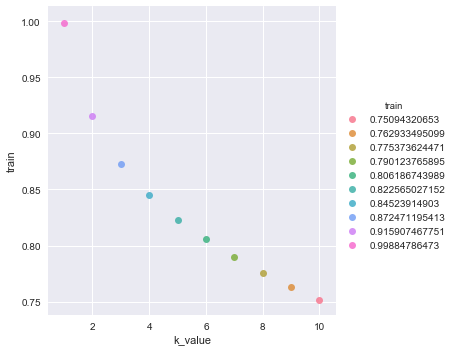

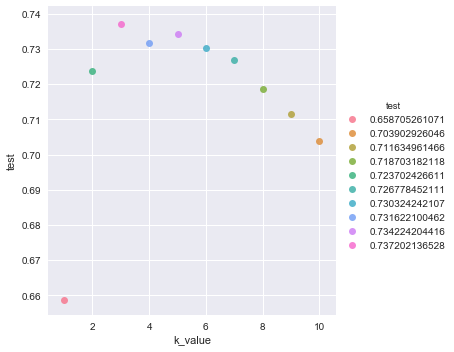

In [81]:
sb.lmplot('k_value','train', data=knn_value , fit_reg=False, hue="train" )
sb.lmplot('k_value','test', data=knn_value , fit_reg=False, hue="test" )
plt.show()

In [83]:
knn = KNeighborsRegressor(n_neighbors = 3 )
knnreg = knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
       .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.87
Accuracy of K-NN classifier on test set: 0.74


**Looking at the above output we have Training Score of 87% and Test Score of 74%**

## CONCLUSION

[[ go back to the top ]](#Table-of-contents)

When I predict the test data from models that built in the assignment, i have got approximately the same score like training, which means we achieved a good fit. Now I realize that why data scientist used to spend most of their time into feature engineering and exploratory analysis compare to actual model building. Model that we are using is definitely important, however more than that understanding our data and feature engineering is crucial.

